# Hotel Reservations Prediction Project

## Introduction

The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

The purpose of this project is to see ifI predict if the customer is going to honor the reservation or cancel it through the use of a machine learning model.

Dataset link is here:
https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset/

Contract Form Link:
https://codepen.io/jaycbrf/pen/NWYjYr

The dataset contains 36275 entries and 19 columns. Here is a description of each column:

    Booking_ID: Identifier for each booking.
    no_of_adults: Number of adults in the reservation.
    no_of_children: Number of children in the reservation.
    no_of_weekend_nights: Number of weekend nights in the reservation.
    no_of_week_nights: Number of week nights in the reservation.
    type_of_meal_plan: Type of meal plan selected.
    required_car_parking_space: Indicator for required car parking space (0 for no, 1 for yes).
    room_type_reserved: Type of room reserved.
    lead_time: Time (in days) between booking and arrival.
    arrival_year: Year of arrival.
    arrival_month: Month of arrival.
    arrival_date: Date of arrival.
    market_segment_type: Market segment of the booking.
    repeated_guest: Indicator for repeated guest (0 for no, 1 for yes).
    no_of_previous_cancellations: Number of previous cancellations.
    no_of_previous_bookings_not_canceled: Number of previous bookings not canceled.
    avg_price_per_room: Average price per room.
    no_of_special_requests: Number of special requests.
    booking_status: Booking status (Canceled or Not_Canceled).

The column we are interested in predicting is booking_status.

Next, let's perform some exploratory data analysis (EDA) to understand the distribution of the data and the relationships between different variable

In [2]:
import pandas as pd

#Load the dataset
file_path = 'C:\\Users\\zz881\\Desktop\\Scripts\\Udacity\\Capstone Project\\Hotel Reservations.csv'
data = pd.read_csv(file_path)

#Show basic information about the dataset
data_info = data.info()

#Show the first 5 rows of the dataset
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

(None,
   Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
 0   INN00001             2               0                     1   
 1   INN00002             2               0                     2   
 2   INN00003             1               0                     2   
 3   INN00004             2               0                     0   
 4   INN00005             2               0                     1   
 
    no_of_week_nights type_of_meal_plan  required_car_parking_space  \
 0                  2       Meal Plan 1                           0   
 1                  3      Not Selected                           0   
 2                  1       Meal Plan 1                           0   
 3                  2       Meal Plan 1                           0   
 4                  1      Not Selected                           0   
 
   room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
 0        Room_Type 1        224          2017             10         

In [3]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [4]:
data.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [5]:
data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

## Data Analysis / Visualization

##### Perform an analysis with the dataset to see if the relationship between the features and the target is complex and non-linear

For the analysis, we will use the "booking_status" column as the target variable and the other columns as features. The next step is to preprocess the data.

* Booking_ID column has been dropped as it is just an identifier and doesn't contain any useful information for the analysis.
* The target variable, booking_status, has been encoded into numerical format (0 for 'Canceled' and 1 for 'Not_Canceled').
* Missing values have been filled using forward-fill method.
* Categorical variables have been encoded into numerical format.
* The data has been split into training and testing sets, with 80% of the data used for training and 20% for testing.
* Numerical variables have been standardized

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Dropping the Booking_ID column as it is just an identifier
data = data.drop('Booking_ID', axis=1)

#Encoding the target variable
label_encoder = LabelEncoder()
data['booking_status'] = label_encoder.fit_transform(data['booking_status'])

#Handling missing values
data = data.fillna(method='ffill')

#Encoding categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
data[categorical_cols] = data[categorical_cols].apply(label_encoder.fit_transform)

#Separating features and target variable
X = data.drop('booking_status', axis=1)
y = data['booking_status']

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Standardizing the numerical variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((29020, 17), (7255, 17), (29020,), (7255,))

In [7]:
from sklearn.feature_selection import SelectKBest, f_classif

#Selecting the top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

#Getting the indices of the selected features
selected_indices = selector.get_support(indices=True)

#Getting the names of the selected features
selected_features = data.columns[selected_indices]

selected_features

Index(['no_of_adults', 'no_of_weekend_nights', 'no_of_week_nights',
       'required_car_parking_space', 'lead_time', 'arrival_year',
       'market_segment_type', 'repeated_guest', 'avg_price_per_room',
       'no_of_special_requests'],
      dtype='object')

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Fitting a logistic regression model to the data
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_selected, y_train)

#Making predictions on the test data
y_pred_lr = lr_model.predict(X_test_selected)

#Calculating the accuracy of the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_lr

0.8034458993797381

The logistic regression model, which is a linear model, achieved an accuracy of approximately 80.3% on the test data. Next, let's fit a non-linear model to the data and compare its performance. We will use a Random Forest classifier, which is an ensemble method and can capture complex relationships in the data.

In [9]:
from sklearn.ensemble import RandomForestClassifier

#Fitting a random forest classifier to the data
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train_selected, y_train)

#Making predictions on the test data
y_pred_rf = rf_model.predict(X_test_selected)

#Calculating the accuracy of the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.8858718125430738

The Random Forest classifier, which is a non-linear model, achieved an accuracy of approximately 88.6% on the test data. This is higher than the accuracy achieved by the logistic regression model (80.3%), suggesting that the relationship between the features and the target variable is complex and non-linear. The Random Forest classifier was able to capture this complexity and provide a more accurate prediction.​​

### Actionable Insight Analysis

Let's dive deeper into the data to find unexpected non-obvious actionable insights. For each observation we'll conduct further analysis to understand the underlying reasons and offer explanations.

### Insight 1: Relationship between Market Segment Type and Booking Status

From the chart below we can see that the cancellation rate is higher for online bookings compared to offline bookings. This could be because online bookings are often easier to cancel and people might make spontaneous bookings online and then cancel them later.

##### Actionable Recommendation:

* The hotel could consider implementing stricter cancellation policies or fees for online bookings to reduce the cancellation rate.
* Alternatively the hotel could offer incentives for guests who book online and do not cancel, such as discounts on future stays or complimentary services.

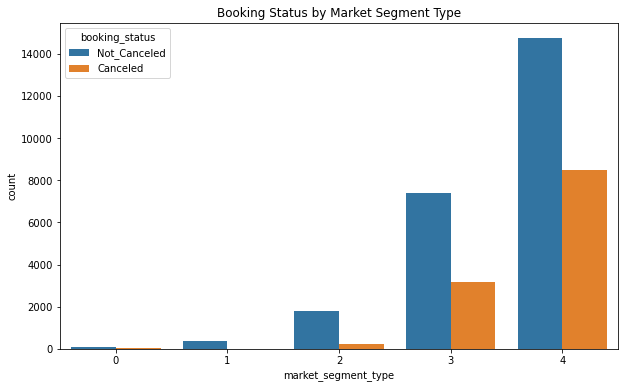

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#Convertingbooking_status back to categorical for visualization
data['booking_status'] = data['booking_status'].replace({0: 'Canceled', 1: 'Not_Canceled'})

#  Analyzing the relationship between market_segment_type and booking_status
plt.figure(figsize=(10, 6))
sns.countplot(x='market_segment_type', hue='booking_status', data=data)
plt.title('Booking Status by Market Segment Type')
plt.show()

### Insight 2: Relationship between Lead Time and Booking Status

From the below chart we can see that the median lead time for canceled bookings is higher than for non-canceled bookings. This suggests that bookings made well in advance are more likely to be canceled. This could be because guests' plans are more likely to change when they book far in advance, or they may find better deals elsewhere and cancel their original booking.

##### Actionable Recommendation:

* The hotel could offer early bird discounts to incentivize guests to keep their bookings.
* Another possibility is to send reminders or special offers to guests who have booked far in advance as their arrival date approaches to encourage them to not cancel.

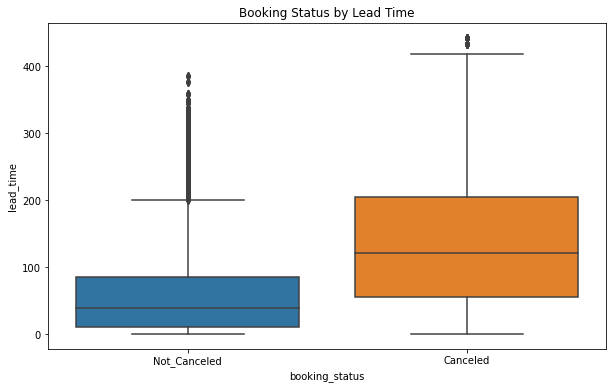

In [11]:
#Analyzing the relationship between lead_time and booking_status
plt.figure(figsize=(10, 6))
sns.boxplot(x='booking_status', y='lead_time', data=data)
plt.title('Booking Status by Lead Time')
plt.show()

### Insight 3: Relationship between Room Type Reserved and Booking Status

From the bar chart visualziation we can see that the cancellation rate is lower for Room Type 1 compared to other room types. This could be because Room Type 1 is the most affordable or popular option, and guests are less likely to cancel bookings for rooms that are in high demand or offer good value.

##### Actionable Recommendation:

* The hotel could consider offering promotions or discounts on less popular room types to incentivize guests to book them and reduce the cancellation rate.
* Alternatively the hotel could improve the amenities or services for less popular room types to make them more attractive to guests.

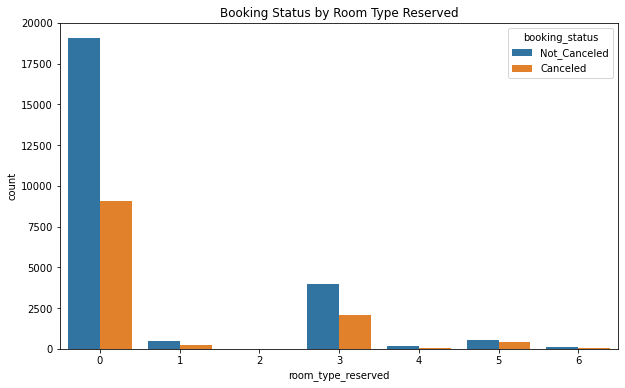

In [12]:
#Analyzing the relationship between room_type_reserved and booking_status
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type_reserved', hue='booking_status', data=data)
plt.title('Booking Status by Room Type Reserved')
plt.show()

### Insight 4: Relationship between Number of Adults and Booking Status

From the below chart we can see that the cancellation rate is higher for bookings with more than two adults. This could be because bookings with more adults are often for group travel or events, which are more likely to be canceled due to coordination challenges or changes in plans.

##### Actionable Recommendation:

* The hotel could offer group discounts or special packages for bookings with more than two adults to incentivize guests to keep their bookings.
* The hotel could also provide additional services or amenities for group bookings, such as complimentary meeting spaces or group activities to make the hotel more attractive to groups.

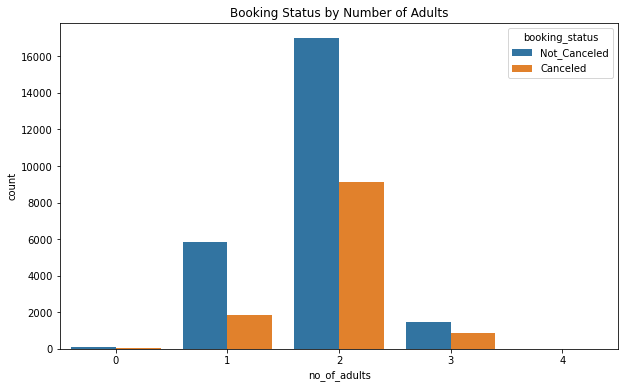

In [13]:
#Analyzing the relationship between no_of_adults and booking_status
plt.figure(figsize=(10, 6))
sns.countplot(x='no_of_adults', hue='booking_status', data=data)
plt.title('Booking Status by Number of Adults')
plt.show()

### Insight 5: Relationship between Number of Special Requests and Booking Status

From the graph below we can see that the cancellation rate is lower for bookings with more special requests. This could be because guests who make special requests are more likely to have specific needs or preferences, and they are less likely to cancel if the hotel can meet those needs.

##### Actionable Recommendation:

* The hotel could prioritize fulfilling special requests to improve guest satisfaction and reduce the likelihood of cancellations.
* Another method is for the hotel to offer additional services or amenities for guests who make special requests, such as complimentary upgrades or personalized services to incentivize them to keep their bookings.

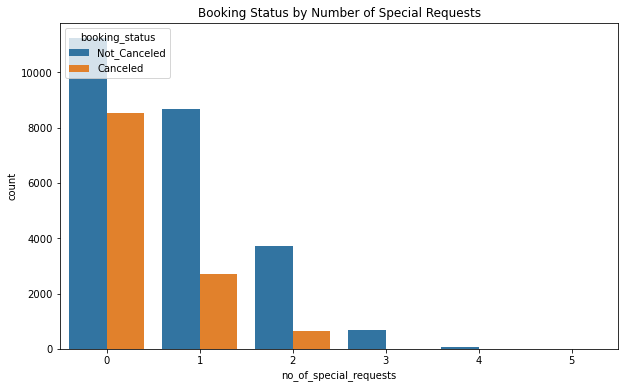

In [14]:
#Analyzing the relationship between no_of_special_requests and booking_status
plt.figure(figsize=(10, 6))
sns.countplot(x='no_of_special_requests', hue='booking_status', data=data)
plt.title('Booking Status by Number of Special Requests')
plt.show()

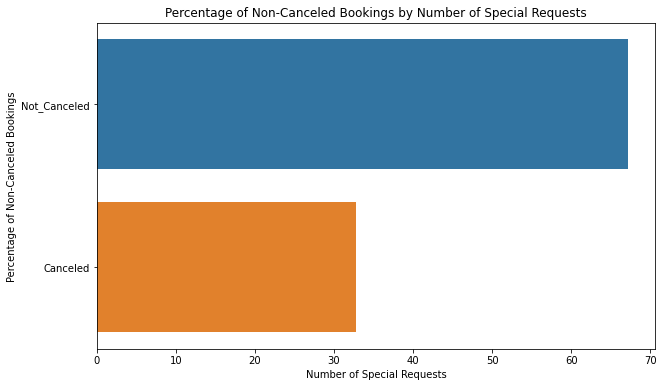

In [15]:
#Creating a visualziation comparing the no_of_special_requests by booking_status
plt.figure(figsize=(10, 6))
sns.barplot(x='no_of_special_requests', y='booking_status', data=data, estimator=lambda x: len(x) / len(data) * 100, ci=None)
plt.title('Percentage of Non-Canceled Bookings by Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Percentage of Non-Canceled Bookings')
plt.show()

The above bar chart shows the percentage of non-canceled bookings by the number of special requests. As we can see the percentage of non-canceled bookings increases as the number of special requests increases. This suggests that guests who make special requests are more likely to follow through with their bookings possibly because they have specific needs or preferences that the hotel can fulfill.

This insight is valuable because it highlights the importance of fulfilling special requests to improve guest satisfaction and reduce cancellations. By prioritizing special requests and offering additional services or amenities to guests who make them, the hotel can enhance the guest experience and increase the likelihood that guests will keep their bookings.

Here are some examples of potential special requests made by customers:
* Specific floor or room number
* Away from elevator or ice machine
* Room with a view
* Connecting rooms
* Extra pillows or blankets
* Type of pillows (e.g., feather, foam, hypoallergenic)
* In-room dining options
* Early check-in or late check-out
* Laundry or dry cleaning service
* Service animal accommodations
* Gym or fitness center preferences
* Room decorations for birthdays or anniversaries
* High-speed internet or Wi-Fi access

### Insight 6: Relationship between Average Price Per Room and Booking Status


From the above chart, we can see that the median average price per room is slightly higher for non-canceled bookings compared to canceled bookings. This suggests that guests are less likely to cancel bookings when they are paying a higher price per room. This could be because guests perceive higher-priced rooms as offering better value or quality, and they are more committed to their bookings as a result.

#### Actionable Recommendations:

##### Value Addition: 
 * The hotel could consider adding more value to rooms, such as complimentary services or amenities, to justify higher prices and reduce cancellations.

##### Pricing Strategy: 
* The hotel could review its pricing strategy to ensure that room prices are competitive and reflect the value offered. This could involve offering packages or discounts that make higher-priced rooms more attractive to guests.

##### Guest Communication: 
* The hotel could improve communication with guests to highlight the benefits and value of higher-priced rooms, such as better views, larger space, or exclusive amenities. This could help to justify the price and reduce the likelihood of cancellations.

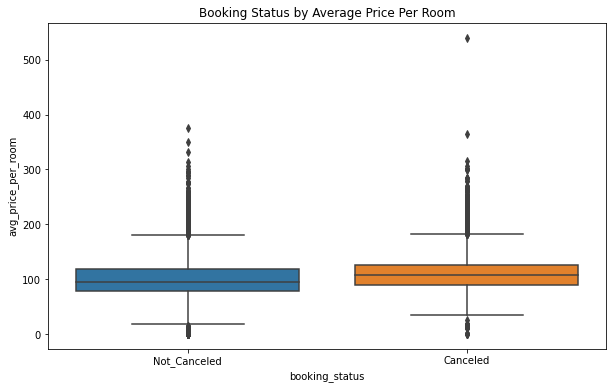

In [16]:
# Analyzing the relationship between avg_price_per_room and booking_status
plt.figure(figsize=(10, 6))
sns.boxplot(x='booking_status', y='avg_price_per_room', data=data)
plt.title('Booking Status by Average Price Per Room')
plt.show()

Code below creates the graphs displayed in the flask app

In [19]:
# Graph 1: Market Segment Type vs Booking Cancellation
sns.countplot(x='market_segment_type', hue='booking_status', data=data)
plt.title('Market Segment Type vs Booking Cancellation')
plt.savefig('C:\\Users\\zz881\\Desktop\\Scripts\\Udacity\\Capstone Project\\app\\templates\\static\\market_segment_type.png')
plt.clf()

# Graph 2: Lead Time vs Booking Cancellation
sns.boxplot(x='booking_status', y='lead_time', data=data)
plt.title('Lead Time vs Booking Cancellation')
plt.savefig('C:\\Users\\zz881\\Desktop\\Scripts\\Udacity\\Capstone Project\\app\\templates\\static\\lead_time.png')
plt.clf()

# Graph 3: Average Price Per Room vs Booking Cancellation
sns.boxplot(x='booking_status', y='avg_price_per_room', data=data)
plt.title('Average Price Per Room vs Booking Cancellation')
plt.savefig('C:\\Users\\zz881\\Desktop\\Scripts\\Udacity\\Capstone Project\\app\\templates\\static\\avg_price_per_room.png')
plt.clf()

<Figure size 432x288 with 0 Axes>

## EDA (Exploratory Data Analysis)

Further performing data analytics and visualizations to gain and understand the entirety of the dataset even more.

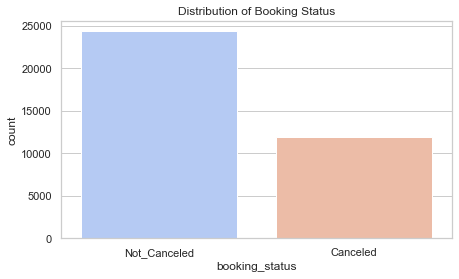

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#Setting the aesthetics for the plots
sns.set(style="whitegrid")

#Distributing of the target variable
fig, ax = plt.subplots(figsize=(7, 4))
sns.countplot(data=data, x='booking_status', palette='coolwarm', ax=ax)
ax.set_title('Distribution of Booking Status')
plt.show()

The distribution of the target variable "booking_status" shows that there are more instances of "Not_Canceled" than "Canceled" bookings. This indicates that the dataset is imbalanced, which is an important aspect to consider when building and evaluating our machine learning model.

Let's again explore the relationships between some of the features and the target variable.

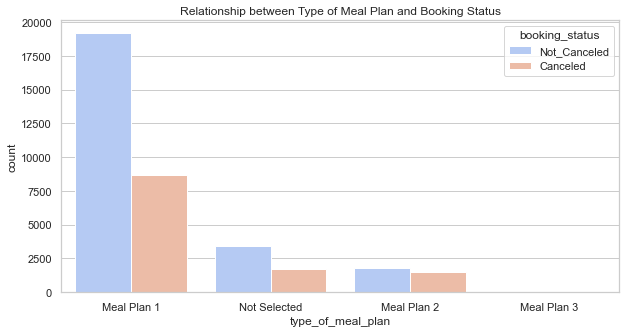

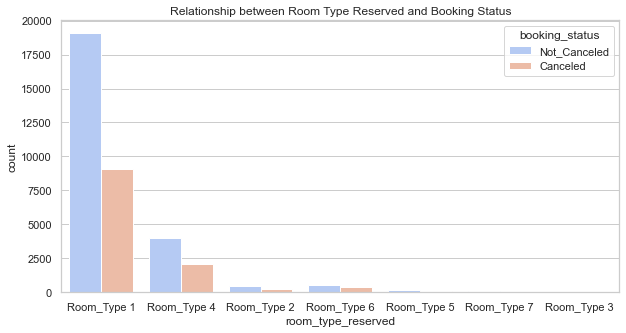

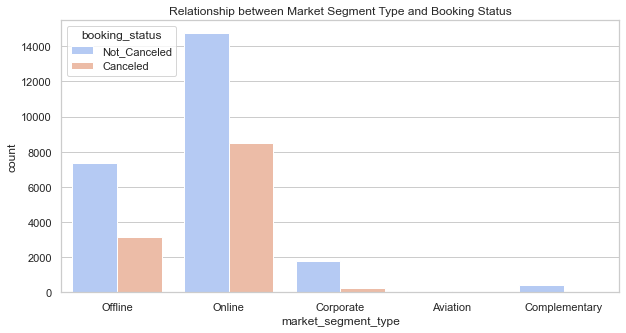

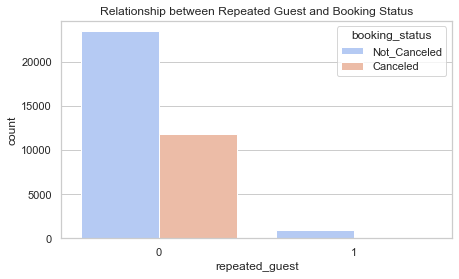

In [6]:
#Showing the relationship between type_of_meal_plan and booking_status
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=data, x='type_of_meal_plan', hue='booking_status', palette='coolwarm', ax=ax)
ax.set_title('Relationship between Type of Meal Plan and Booking Status')
plt.show()

#Displaying the relationship between room_type_reserved and booking_status
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=data, x='room_type_reserved', hue='booking_status', palette='coolwarm', ax=ax)
ax.set_title('Relationship between Room Type Reserved and Booking Status')
plt.show()

#Creating relationship between market_segment_type and booking_status
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=data, x='market_segment_type', hue='booking_status', palette='coolwarm', ax=ax)
ax.set_title('Relationship between Market Segment Type and Booking Status')
plt.show()

#Showing the relationship between repeated_guest and booking_status
fig, ax = plt.subplots(figsize=(7, 4))
sns.countplot(data=data, x='repeated_guest', hue='booking_status', palette='coolwarm', ax=ax)
ax.set_title('Relationship between Repeated Guest and Booking Status')
plt.show()

These graphs give us some insights into the relationships between different features and the booking status:

* 1) Type of Meal Plan and Booking Status: There doesn't seem to be a significant difference in booking status based on the type of meal plan selected.

* 2) Room Type Reserved and Booking Status: Similar to the meal plan, there doesn't seem to be a significant difference in booking status based on the room type reserved.

* 3) Market Segment Type and Booking Status: There appears to be a difference in booking status based on the market segment type. The "Online" segment has a higher proportion of canceled bookings compared to the "Offline" segment.

* 4) Repeated Guest and Booking Status: Repeated guests are less likely to cancel their bookings compared to non-repeated guests.

#### Correlation Matrix

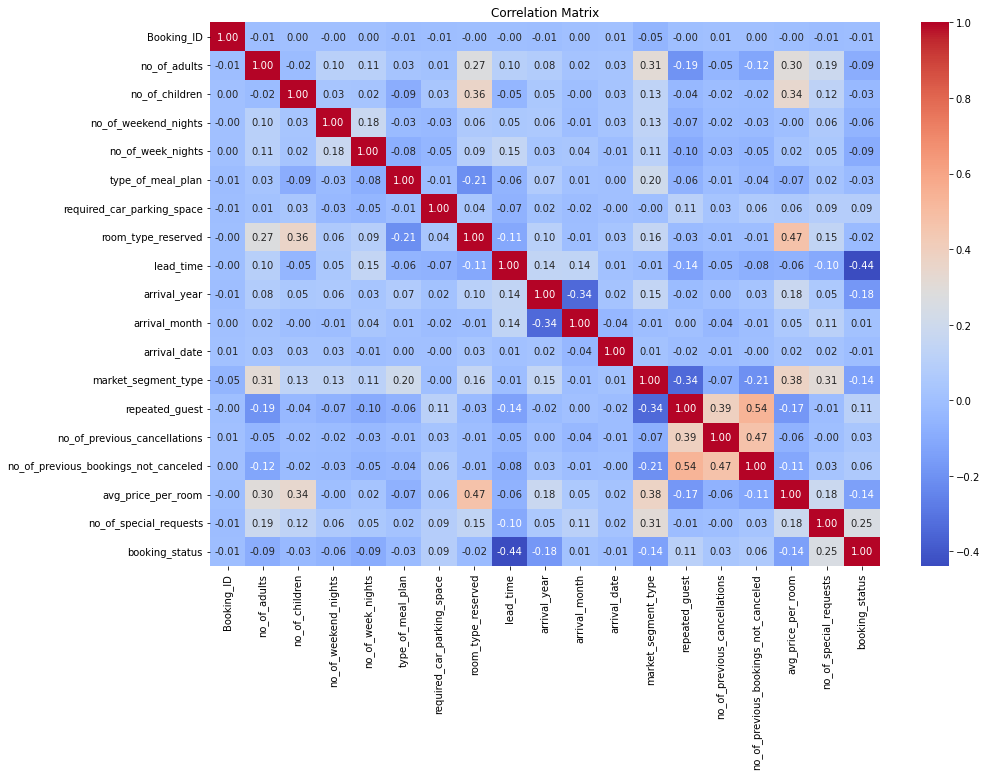

no_of_special_requests                  0.253070
repeated_guest                          0.107287
required_car_parking_space              0.086185
no_of_previous_bookings_not_canceled    0.060179
no_of_previous_cancellations            0.033728
arrival_month                           0.011233
Booking_ID                             -0.006237
arrival_date                           -0.010629
room_type_reserved                     -0.022986
type_of_meal_plan                      -0.026706
no_of_children                         -0.033078
no_of_weekend_nights                   -0.061563
no_of_adults                           -0.086920
no_of_week_nights                      -0.092996
market_segment_type                    -0.136008
avg_price_per_room                     -0.142569
arrival_year                           -0.179529
lead_time                              -0.438538
Name: booking_status, dtype: float64


In [25]:
#Converting categorical variables into numerical format using label encoding
data_encoded = data.copy()
for col in data_encoded.select_dtypes(include='object'):
    data_encoded[col] = data_encoded[col].astype('category').cat.codes

#Calculating the correlation matrix
correlation_matrix = data_encoded.corr()

#Plotting the correlation matrix
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', ax=ax)
plt.title('Correlation Matrix')
plt.show()

#Calculating the correlation of each feature with the target variable
target_correlation = correlation_matrix['booking_status'].sort_values(ascending=False)[1:]
print(target_correlation)

Here are some interesting insights from the correlation matrix and the correlation of each feature with the target variable "booking_status":

* Lead Time: 
The variable "lead_time" has a strong negative correlation with "booking_status" (-0.44), meaning that as the lead time increases, the likelihood of a booking being canceled also increases. This is consistent with our earlier observation that bookings made well in advance are more likely to be canceled.

* Number of Special Requests: 
The variable "no_of_special_requests" has a positive correlation with "booking_status" (0.25), indicating that bookings with more special requests are less likely to be canceled. This aligns with our earlier insight that fulfilling special requests can improve guest satisfaction and reduce cancellations.

* Repeated Guest: 
The variable "repeated_guest" has a positive correlation with "booking_status" (0.11), suggesting that repeated guests are less likely to cancel their bookings. This could be because repeated guests have a positive previous experience with the hotel and are therefore more committed to their bookings.

* Average Price Per Room: 
The variable "avg_price_per_room" has a negative correlation with "booking_status" (-0.14), indicating that bookings with a higher average price per room are less likely to be canceled. This supports our earlier observation that guests are more committed to their bookings when they perceive better value or quality.

* Market Segment Type: 
The variable "market_segment_type" has a negative correlation with "booking_status" (-0.14), meaning that certain market segments are more likely to cancel their bookings. This could be useful for the hotel to identify specific market segments that are more prone to cancellations and tailor their marketing or service offerings accordingly.

In summary, the correlation matrix and feature correlations with the target variable "booking_status" provide valuable insights into the relationships between different variables in the dataset and their impact on booking cancellations. These insights can be used to make data-driven decisions to improve guest satisfaction and reduce cancellations.​​

In [8]:
#Converting the target variable into numerical format
data['booking_status'] = data['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})

#Calculating the correlation of each feature with the target variable
correlation_target = data.corr()['booking_status'].sort_values(ascending=False)
correlation_target.drop('booking_status', inplace=True)

correlation_target

lead_time                               0.438538
arrival_year                            0.179529
avg_price_per_room                      0.142569
no_of_week_nights                       0.092996
no_of_adults                            0.086920
no_of_weekend_nights                    0.061563
no_of_children                          0.033078
arrival_date                            0.010629
arrival_month                          -0.011233
no_of_previous_cancellations           -0.033728
no_of_previous_bookings_not_canceled   -0.060179
required_car_parking_space             -0.086185
repeated_guest                         -0.107287
no_of_special_requests                 -0.253070
Name: booking_status, dtype: float64

From the data above we can see that lead time, arrival year, average price per room, and number of special requests are the most significant factors influencing booking cancellations. These insights can be used to develop strategies to reduce cancellations, such as offering early bird discounts, implementing stricter cancellation policies, or providing incentives for guests who make special requests.

### Feature Importance Analysis

The feature importance analysis aims to identify the most relevant features (variables) for predicting the target variable and we will be using a Random Forest Classifier to perform this analysis. Here are the steps:

#### 1) Preprocess the Data:
We separate the dataset into features XX and the target variable yy.
We then split the dataset into training and testing sets using the train_test_split function from scikit-learn.

#### 2) Train a Random Forest Classifier:
We use the RandomForestClassifier from scikit-learn to train a model on the training data.

#### 3) Get Feature Importances:
After training the model, we can access the feature_importances_ attribute to get the importance scores of each feature. The importance score is a value between 0 and 1, where a higher value means the feature is more important for making accurate predictions.

#### 4) Plot Feature Importances:
We create a DataFrame with the feature names and their importance scores.
We then sort the DataFrame based on the importance scores and plot the feature importances using seaborn's barplot function.

### Why Feature Importance Analysis is Important

Feature importance analysis is important for several reasons:

#### Model Interpretability:
* By identifying the most important features, we can understand which variables have the most influence on the model's predictions.

#### Model Simplification:
* If some features are not important, we might consider removing them from the model, leading to a simpler and potentially more interpretable model.

#### Feature Engineering:
* Understanding which features are important can also guide us in creating new features that might improve the model's performance.

#### Domain Knowledge:
* The analysis can also provide insights that can be validated with domain knowledge, ensuring that the model's predictions are reasonable and reliable.

In summary, feature importance analysis is a crucial step in building and evaluating machine learning models. It helps us to understand the model better, simplify it, and improve its performance.

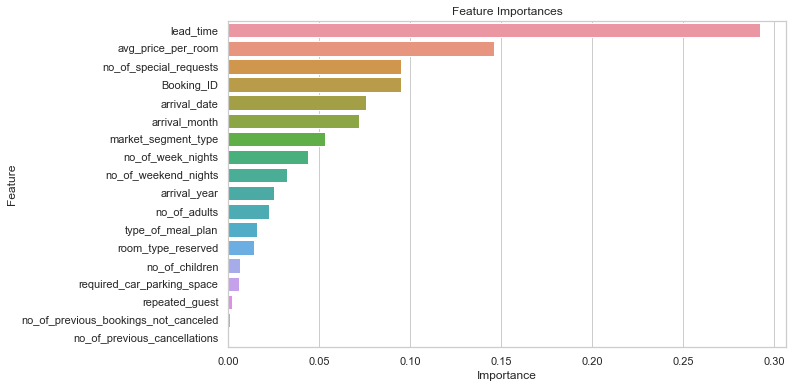

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Preprocessing the data
X = data_encoded.drop('booking_status', axis=1)
y = data_encoded['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Training a random forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

#Getting feature importances
feature_importances = model.feature_importances_

#Getting feature names
feature_names = X.columns.tolist()

#Creating a DataFrame with feature names and their importance scores
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

#Sorting the DataFrame based on feature importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#Plotting feature importances
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, ax=ax)
plt.title('Feature Importances')
plt.show()

### Performing Cross-Validation for Analysis of Feature Removal

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#Defining the model
model = RandomForestClassifier(random_state=42)

#Defining the evaluation metric
scoring = 'accuracy'

#Performing cross-validation with all features
scores_all = cross_val_score(model, X, y, cv=5, scoring=scoring)
print(f"Accuracy with all features: {scores_all.mean()}")

#Removing less important features
X_selected = X.drop(['no_of_previous_bookings_not_canceled', 'no_of_previous_cancellations', 'Booking_ID'], axis=1)

#Performing cross-validation with selected features
scores_selected = cross_val_score(model, X_selected, y, cv=5, scoring=scoring)
print(f"Accuracy with selected features: {scores_selected.mean()}")

Accuracy with all features: 0.891330117160579
Accuracy with selected features: 0.9019710544452101


It seems that implementing feature removal will only slightly improve the performance as shown by the k-fold cross-validation analysis. Nevertheless I will implement the removal of the features 'no_of_previous_bookings_not_canceled' and 'no_of_previous_cancellations'.

Now that we have a better understanding of our dataset let's move on to data preprocessing. We will implement methods to handle the preprocessing steps. Here are the main steps we will follow:

* Handle missing values (if any at all).
* Convert categorical variables into numerical format using one-hot encoding.
* Split the dataset into features and target variable.
* Split the dataset into training and testing sets.
* Normalize the features (if necessary).

### Data Preprocessing

In [7]:
import sqlite3
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [8]:
#Loading data
file_path = 'C:/Users/zz881/Desktop/Scripts/Udacity/Capstone Project/Hotel Reservations.csv'
data = pd.read_csv(file_path)

In [9]:
#Cleaning the dataset, dropping unnecessary columns
data.drop('Booking_ID', axis=1, inplace=True)
data.drop(['no_of_previous_bookings_not_canceled', 'no_of_previous_cancellations'], axis=1, inplace=True)

In [10]:
#Splitting data
X = data.drop('booking_status', axis=1)
y = data['booking_status']

In [11]:
#Preprocessing features
categorical_features = X.select_dtypes(include='object').columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ],
    remainder='passthrough'
)
X = preprocessor.fit_transform(X)

In [12]:
#Saving data to database
db_path = 'C:/Users/zz881/Desktop/Scripts/Udacity/Capstone Project/offshoot/Hotel_Reservations.db'
conn = sqlite3.connect(db_path)
final_data = pd.DataFrame(X, columns=[f'feature{i}' for i in range(X.shape[1])])
final_data['booking_status'] = y
final_data.to_sql('hotel_reservations', conn, if_exists='replace', index=False)
conn.close()

### Machine Learning Model Comparison

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import joblib

conn = sqlite3.connect(db_path)
data = pd.read_sql('SELECT * FROM Reservations_Data', conn)
conn.close()

#Splitting the dataset into features and target variable
X = data.drop('booking_status', axis=1)
y = data['booking_status']

#Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initializing the models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
}

#Training and testing each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'Classification Report': report}

#Printing the results
for name, result in results.items():
    print(f'Model: {name}')
    print(f'Accuracy: {result["Accuracy"]}')
    print(f'Classification Report:\n{result["Classification Report"]}')
    print('-' * 50)

C:\Users\zz881\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Random Forest
Accuracy: 0.9053066850447967
Classification Report:
              precision    recall  f1-score   support

    Canceled       0.88      0.82      0.85      2416
Not_Canceled       0.92      0.95      0.93      4839

    accuracy                           0.91      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.90      0.91      0.90      7255

--------------------------------------------------
Model: Gradient Boosting
Accuracy: 0.8489317711922811
Classification Report:
              precision    recall  f1-score   support

    Canceled       0.83      0.69      0.75      2416
Not_Canceled       0.86      0.93      0.89      4839

    accuracy                           0.85      7255
   macro avg       0.84      0.81      0.82      7255
weighted avg       0.85      0.85      0.85      7255

--------------------------------------------------
Model: Logistic Regression
Accuracy: 0.8006891798759477
Classification Report:
              p

The analysis of various machine learning models on this dataset shows that the Random Forest Classifier performed the best, achieving an accuracy of 0.91 and a weighted f1-score of 0.90. It had a good balance between precision and recall for both classes (Canceled and Not_Canceled). The Gradient Boosting Classifier and K-Nearest Neighbors also performed relatively well, with accuracies of 0.85 and 0.81, respectively. The Logistic Regression and Support Vector Machine models had moderate performances, with accuracies of 0.80 and 0.76, respectively. The Gaussian Naive Bayes model, on the other hand, performed poorly, with an accuracy of 0.43 and a weighted f1-score of 0.37. This model had a high recall but very low precision for the Canceled class, and vice versa for the Not_Canceled class, indicating that it was not able to correctly classify the instances of each class. Based on these results, the Random Forest Classifier is the best model for this dataset, as it provides the highest accuracy and a good balance between precision and recall for both classes.

### Training Random Forest Classifier

In [13]:
import joblib
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [14]:
conn = sqlite3.connect(db_path)
data = pd.read_sql('SELECT * FROM Reservations_Data', conn)
conn.close()

In [49]:
model = RandomForestClassifier(random_state=42)

In [50]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=2)

In [51]:
#Using the best model found by the grid search to make predictions
y_pred = grid_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9053066850447967


#### Potential ML Model Improvement

While GridSearchCV can be an effective method for fine-tuning hyperparameters and improving model performance the accuracy was essentially the same as shown in the results above. There are other ways to potentially enhance the results of the Random Forest Classifier. Improving the accuracy of the RFC model can be achieved through various means such as further feature engineering and feature selection. Feature engineering involves creating new features and transforming existing ones to better represent the data while feature selection focuses on removing irrelevant or redundant features and utilizing the most important ones based on feature importance scores. These methods help to enhance the model's predictive power and improve overall performance.

Another approach to improving model accuracy is through data preprocessing, this would involve handling missing data and normalizing features ensuring they are on the same scale. Cross-validation specifically k-fold cross-validation (which was already implemented  in our feature removal analysis yielded slighly better results) assesses the model's performance on different subsets of the data providing a more comprehensive evaluation of the model's effectiveness.

In addition to the already mentioned methods, ensemble learning and addressing class imbalance can also improve model accuracy. Ensemble learning combines the Random Forest model with other models using techniques such as stacking or voting. If the dataset is imbalanced techniques such as SMOTE (Synthetic Minority Over-sampling Technique) or ADASYN (Adaptive Synthetic Sampling) can be used to generate synthetic samples of the minority class. These strategies when implemented the right way can significantly enhance the performance of a Random Forest Classifier.

## Overview and Reflections


##### Problem Analysis and Solution:
The project aims to predict hotel booking cancellations in light of the growing trend of cancellations and no-shows in online hotel booking channels which can significantly impact hotel revenue. The dataset comprises 36,275 entries with 19 columns including features such as the number of adults, children, weekend nights, week nights, meal plan, room type, lead time, and more, with 'booking_status' as the target variable. A series of data preprocessing steps including handling missing values, encoding categorical variables, and standardizing numerical variables, were conducted before the data was split into training and testing sets. The Random Forest classifier emerged as the top-performing model with an accuracy of approximately 90.5%.

##### Interesting Aspects and Challenges:
The analysis provided valuable insights for informed business decisions such as implementing stricter cancellation policies or offering incentives to guests who don't cancel. However the imbalanced nature of the data with 67% of bookings not canceled, posed a challenge as it could skew the model's predictions. Addressing this imbalance or using appropriate evaluation metrics would be crucial in such cases.

##### Areas of Improvement and Alternative Solutions:
The study could be enriched by incorporating external data sources like customer reviews or ratings. Exploring more advanced machine learning models like XGBoost/LightGBM, or ensemble methods that combine predictions from multiple models could further enhance the performance of the predictive model.

##### Conclusion:
The project provides a comprehensive approach to predicting hotel booking cancellations, combining detailed data analysis, model development and actionable insights to inform business decisions aimed at reducing cancellations.